In [2]:
%reload_ext autoreload
%autoreload 2

import cv2

import os
import sys
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *

from collections import defaultdict

from matplotlib.path import Path
%matplotlib inline

from skimage.transform import estimate_transform

In [3]:
from enum import Enum

class PolygonType(Enum):
    CLOSED = 'closed'
    OPEN = 'open'
    TEXTURE = 'textured'
    TEXTURE_WITH_CONTOUR = 'texture with contour'
    DIRECTION = 'directionality'

In [4]:
stack = 'MD589'

In [55]:
indexMapOldToNew = dict(np.loadtxt(os.environ['DATA_DIR']+'/'+stack+'_indexMapOldToNew.txt').astype(np.int))

In [25]:
old_transforms = pickle.load(open(os.environ['DATA_DIR']+'/MD999_finalTransfParams.pkl', 'r'))

In [88]:
if os.path.exists('/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_originalLossless/'):
    os.system('rm -r ' + '/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_originalLossless/')

for old_sec, new_sec in indexMapOldToNew.iteritems():

    try:
        dm = DataManager(stack=stack, section=old_sec, load_mask=False,
                        labeling_dir='/home/yuncong/CSHL_data_labelings/')
        user, ts, _, res  = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')
    except:
        continue
        
    sys.stderr.write('%d, %d\n' % (old_sec, new_sec))
    
    new_res = []
    for pol in res:
        new_pol = pol.copy()
        if len(pol['vertices']) == 0:
            continue
            
        
        vs = np.dot(old_transforms[old_sec], 
               (np.dot(np.diag([1./32, 1./32, 1]), 
                       np.c_[pol['vertices'], np.ones((len(pol['vertices']),))].T) + np.array([645, 132, 0])[:,np.newaxis]))[:2].T
        vs *= 32
        new_pol['vertices'] = vs
        
        vs = np.dot(old_transforms[old_sec], 
               (np.dot(np.diag([1./32, 1./32, 1]), 
                       np.r_[new_pol['labelPos'],1]) + [645, 132, 0]))[:2]
        vs *= 32
        new_pol['labelPos'] = np.squeeze(vs)
        
        new_res.append(new_pol)
        
    out_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_originalLossless/' + stack + '/' + '%04d'%new_sec
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    pickle.dump(new_res, 
                open(out_dir + '/' + stack + '_' + '%04d'%new_sec + '_' + user + '_' + ts + '_consolidated.pkl', 'w'))

Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any la

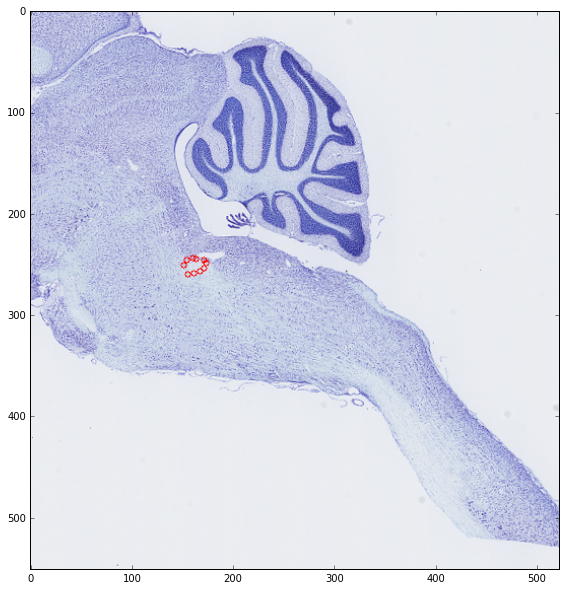

In [75]:
old_sec = 100
dm = DataManager(stack='MD589', section=old_sec, load_mask=False, 
                 labeling_dir='/home/yuncong/CSHL_data_labelings/')
user, ts, _, res2 = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')

vs = [i for i in res2 if i['label'] == '7n'][0]['vertices']

img = imread(os.environ['DATA_DIR'] + '/MD999_thumbnail_aligned_cropped/MD999_%04d_thumbnail_aligned_cropped.tif'%\
             old_sec)
viz = img_as_ubyte(img)

for x,y in np.asarray(vs) / 32.:
    cv2.circle(viz, (int(x), int(y)), 3, (255,0,0))
    
plt.figure(figsize=(10,10));
plt.imshow(viz);

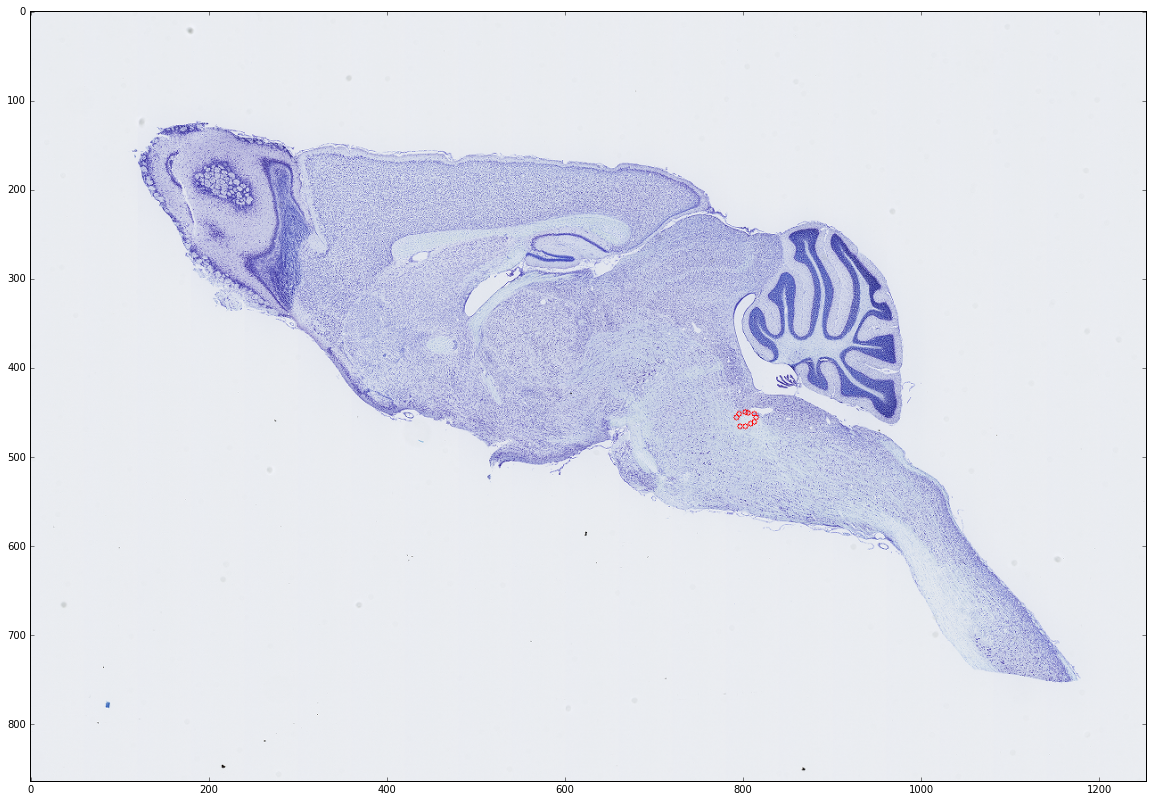

In [76]:
old_sec = 100
dm = DataManager(stack='MD589', section=old_sec, load_mask=False, 
                 labeling_dir='/home/yuncong/CSHL_data_labelings/')
user, ts, _, res2 = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')

img = imread(os.environ['DATA_DIR'] + '/MD589_thumbnail_renamed/MD589_%04d_thumbnail.tif'% indexMapOldToNew[old_sec])

vs = [i for i in res2 if i['label'] == '7n'][0]['vertices']

vs = np.dot(old_transforms[old_sec], 
               (np.dot(np.diag([1./32, 1./32, 1]), 
                       np.c_[vs, np.ones((len(vs),))].T) + np.array([645, 132, 0])[:,np.newaxis]))[:2].T

viz = img_as_ubyte(img)

for x,y in vs:
    cv2.circle(viz, (int(x), int(y)), 3, (255,0,0))
    
plt.figure(figsize=(20,20));
plt.imshow(viz);

In [83]:
transforms = pickle.load(open(os.environ['DATA_DIR']+'/' + stack + '_finalTransfParams.pkl', 'r'))

In [84]:
mapping_originalLosslessToLosslessAlignedCropped = dict()

for i in indexMapOldToNew.itervalues():
    T = np.linalg.inv(transforms[i])
    T[:2, 2] = (T[:2, 2] - [643, 145])*32
    mapping_originalLosslessToLosslessAlignedCropped[i] = T

pickle.dump(mapping_originalLosslessToLosslessAlignedCropped, 
            open(os.environ['DATA_DIR'] +'/' + stack + '_mappingFromOriginalLosslessToLosslessAlignedCropped.pkl', 'w'))

In [16]:
dm = DataManager(stack='MD589', section=197, load_mask=False, 
                 labeling_dir='/home/yuncong/CSHL_data_labelings_originalLossless/')
user, ts, _, res2 = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')

dm._load_image('rgb-jpg')
img = dm.image_rgb

vs = [i for i in res2 if i['label'] == 'Pn'][0]['vertices']

T = mapping_originalLosslessToLosslessAlignedCropped[197]
vs = np.dot(T, np.vstack([vs.T, np.ones((1, vs.shape[0]))]))[:2].T

viz = img_as_ubyte(img)

for x,y in vs:
    cv2.circle(viz, (int(x), int(y)), 20, (255,0,0), -1)
    
xmin, ymin = vs.min(axis=0)
xmax, ymax = vs.max(axis=0)
display(viz[ymin:ymax+1, xmin:xmax+1])

/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/PIL/Image.py:2224: DecompressionBombWarning: Image size (157463552 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/oasis/projects/nsf/csd181/yuncong/virtualenv-1.9.1/yuncongve/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [49]:
mapping_originalLosslessToThumbnailAlignedCropped = dict()

for i in indexMapOldToNew.itervalues():
    T = np.linalg.inv(transforms[i])
    T[:2, 2] = T[:2, 2] - [643, 145]
    mapping_originalLosslessToThumbnailAlignedCropped[i] = T
    
# pickle.dump(mapping_originalLosslessToThumbnailAlignedCropped, 
#             open(os.environ['DATA_DIR'] +'/' + stack + '_mapping_originalLosslessToThumbnailAlignedCropped.pkl', 'w'))

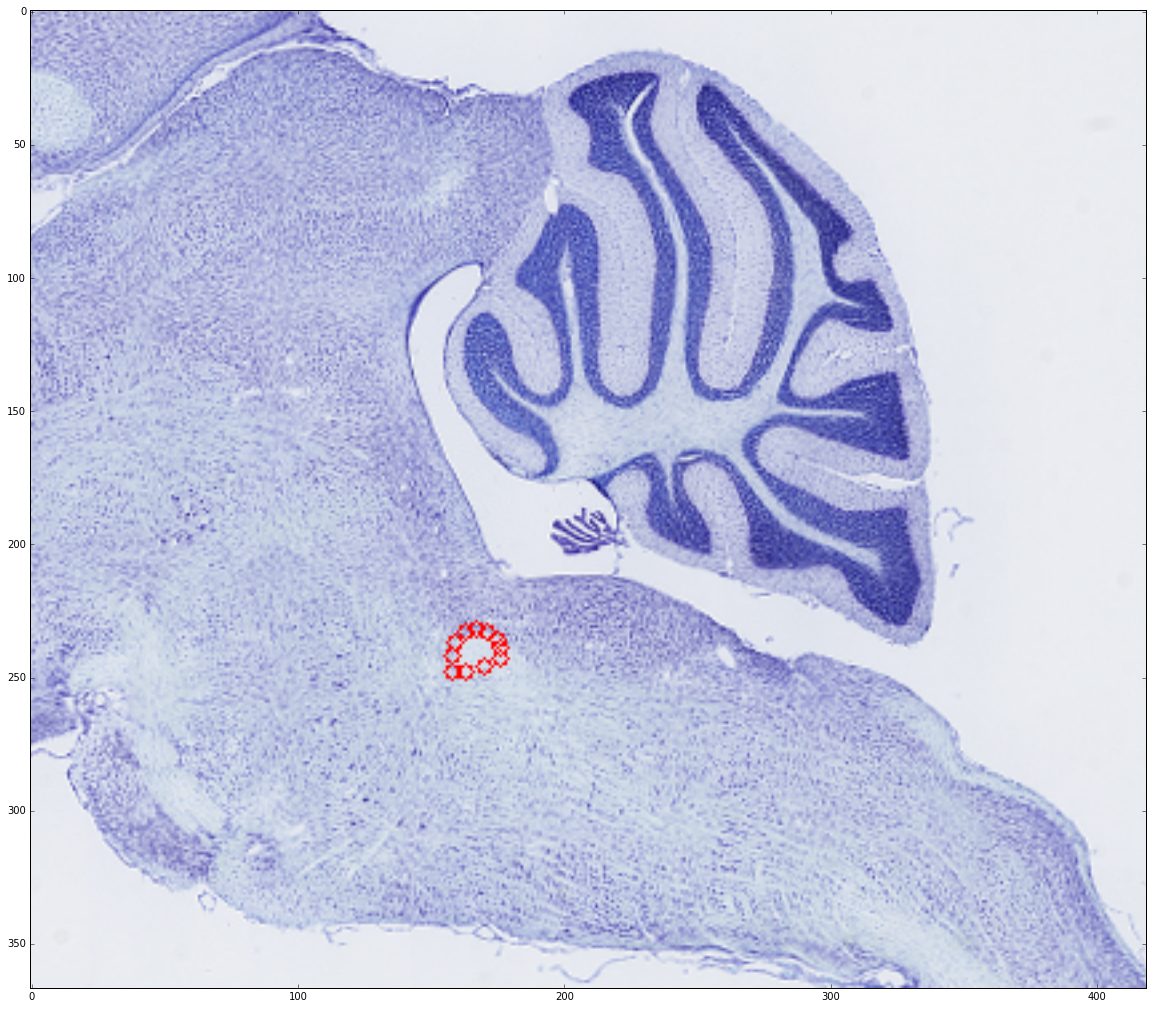

In [80]:
sec = 199
dm = DataManager(stack='MD589', section=sec, load_mask=False, 
                 labeling_dir='/home/yuncong/CSHL_data_labelings_originalLossless/')
user, ts, _, res2 = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')


img = imread(os.environ['DATA_DIR'] + '/MD589_thumbnail_aligned_cropped/MD589_%04d_thumbnail_aligned_cropped.tif'%sec)

vs = [i for i in res2 if i['label'] == '7n'][0]['vertices'] / 32.

T = mapping_originalLosslessToThumbnailAlignedCropped[sec]
vs = np.dot(T, np.vstack([vs.T, np.ones((1, vs.shape[0]))]))[:2].T

viz = img_as_ubyte(img)

for x,y in vs:
    cv2.circle(viz, (int(x), int(y)), 3, (255,0,0))
    
plt.figure(figsize=(20,20));
plt.imshow(viz);

In [81]:
if os.path.exists('/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped/'):
    os.system('rm -r ' + '/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped/')

In [89]:
for section in indexMapOldToNew.itervalues():

    try:
        dm = DataManager(stack=stack, section=section, load_mask=False, 
                         labeling_dir='/home/yuncong/CSHL_data_labelings_originalLossless/')
        user, ts, _, results = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')
    except:
        continue
    
    print section

    T = mapping_originalLosslessToLosslessAlignedCropped[section]
    
    new_res = []
    for pol in results:
        new_pol = pol.copy()
        if len(pol['vertices']) == 0:
            continue
        
        vs = pol['vertices']
        new_pol['vertices'] = np.dot(T, np.vstack([vs.T, np.ones((1, vs.shape[0]))]))[:2].T.astype(np.int) 
        
        vs = pol['labelPos']
        new_pol['labelPos'] = np.squeeze(np.dot(T, np.r_[vs, 1]))[:2].T.astype(np.int)
        
        new_res.append(new_pol)

    out_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped/' + stack + '/' + '%04d'%section
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    pickle.dump(new_res, 
                open(out_dir + '/' + stack + '_' + '%04d'%section + '_' + user + '_' + ts + '_consolidated.pkl', 'w'))

Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any la

111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199
201
203
205
207
209
211
213
215
217
219
221
223
225
227
229
231
233
235
237
239
241
243
245
247
249
251
253
255
257
259
261
263
265
267
269
271
273
275
277
279
281
283
285
287
289
291
293
295
297
299
300
302
304
306
308
310
312
314
316
318
320
322
323
325
327
329
331
333
335
337
339
341
343
345
347
349
351

username yuncong does not have any labelings
username yuncong does not have any labelings
username yuncong does not have any labelings
username yuncong does not have any labelings
username yuncong does not have any labelings
username yuncong does not have any labelings
username yuncong does not have any labelings
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot fin

username yuncong does not have any labelings


In [ ]:
img =imread(os.environ['DATA_DIR'] + '/MD589_thumbnail_aligned/MD589_0197_thumbnail_aligned.tif')
vs = [i for i in new_res if i['label'] == 'Pn'][0]['vertices']
viz = img_as_ubyte(img)

for x,y in vs:
    cv2.circle(viz, (int(x), int(y)), 3, (255,0,0))
    
plt.figure(figsize=(20,20));
plt.imshow(viz);